In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'Downloads\loan_data_1.csv')

data.fillna(0, inplace=True)  
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})  

inputs = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].values
outputs = data['Loan_Status'].values


np.random.seed(42)
weights = np.random.rand(inputs.shape[1])


def summation_unit(inputs, weights):
    return np.dot(inputs, weights)


def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return max(0, x)

def leaky_relu_function(x, alpha=0.01):
    return x if x > 0 else alpha * x


def comparator_unit(predicted, actual):
    return np.mean((predicted - actual) ** 2)


predictions = []
activation_results = []

for i in range(len(inputs)):
    weighted_sum = summation_unit(inputs[i], weights)
    
  
    step_result = step_function(weighted_sum)
    sigmoid_result = sigmoid_function(weighted_sum)
    
   
    predictions.append(round(sigmoid_result))
    
    activation_results.append({
        "Step": step_result,
        "Sigmoid": sigmoid_result,
        "TanH": tanh_function(weighted_sum),
        "ReLU": relu_function(weighted_sum),
        "Leaky ReLU": leaky_relu_function(weighted_sum)
    })


predictions = np.array(predictions)
error = comparator_unit(predictions, outputs)


print("Sample Activation Results:", activation_results[:5])
print("Error (Mean Squared Error):", error)


Sample Activation Results: [{'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 3243.889763295476, 'Leaky ReLU': 3243.889763295476}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 1171.93195670164, 'Leaky ReLU': 1171.93195670164}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 3297.0607345146886, 'Leaky ReLU': 3297.0607345146886}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 2350.4518588795827, 'Leaky ReLU': 2350.4518588795827}, {'Step': 1, 'Sigmoid': 1.0, 'TanH': 1.0, 'ReLU': 2384.624410260413, 'Leaky ReLU': 2384.624410260413}]
Error (Mean Squared Error): 0.2887139107611549


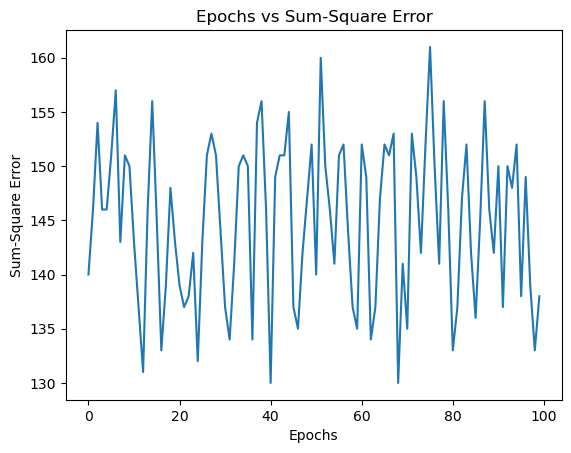

Final Weights: [ 6.000000e-01 -6.965000e+01 -1.253826e+03 -5.900000e+00]
Total Epochs: 100


In [3]:

W0 = 10  
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

weights = np.array([W0, W1, W2, 0]) 
def step_function(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, weights, learning_rate, max_epochs=100):
    epochs = 0
    errors = []
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs]  

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = step_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        errors.append(total_error)
        epochs += 1

    return weights, epochs, errors

final_weights, epochs, errors = train_perceptron(inputs, outputs, weights, learning_rate)

plt.plot(range(epochs), errors)
plt.title("Epochs vs Sum-Square Error")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.show()

print("Final Weights:", final_weights)
print("Total Epochs:", epochs)


C:\Users\eswar\AppData\Local\Temp\ipykernel_14180\849354010.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


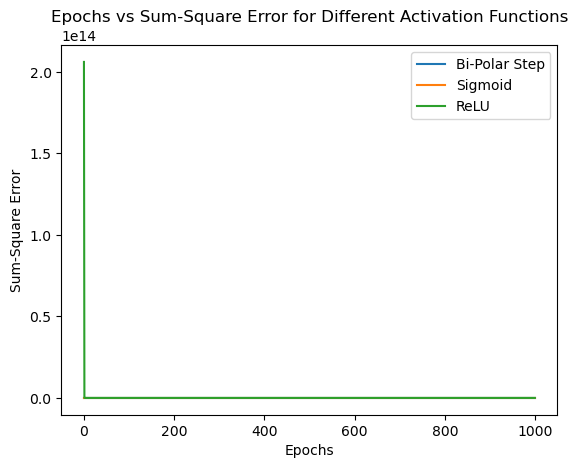

Bi-Polar Step - Final Weights: [ -45.8   527.2  -425.35   12.  ], Epochs: 1000
Sigmoid - Final Weights: [-85.89139143   4.4239225  201.3969651   -3.51860187], Epochs: 1000
ReLU - Final Weights: [-7.19768901e+05 -2.28016881e+07 -1.31589875e+09 -8.90317937e+07], Epochs: 1000


In [5]:

W0 = 10 
W1 = 0.2
W2 = -0.75
learning_rate = 0.05


initial_weights = np.array([W0, W1, W2, 0])  

def bipolar_step_function(x):
    return 1 if x >= 0 else -1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

def train_perceptron(inputs, outputs, weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    errors = []
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs] 

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = activation_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        errors.append(total_error)
        epochs += 1

        if total_error <= convergence_threshold:
            converged = True

    return weights, epochs, errors

activation_functions = {
    "Bi-Polar Step": bipolar_step_function,
    "Sigmoid": sigmoid_function,
    "ReLU": relu_function
}

results = {}

for name, activation_function in activation_functions.items():
    weights = initial_weights.copy() 
    final_weights, epochs, errors = train_perceptron(inputs, outputs, weights, learning_rate, activation_function)
    results[name] = {
        "Final Weights": final_weights,
        "Epochs": epochs,
        "Errors": errors
    }

    plt.plot(range(epochs), errors, label=name)

plt.title("Epochs vs Sum-Square Error for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Sum-Square Error")
plt.legend()
plt.show()

for name, result in results.items():
    print(f"{name} - Final Weights: {result['Final Weights']}, Epochs: {result['Epochs']}")


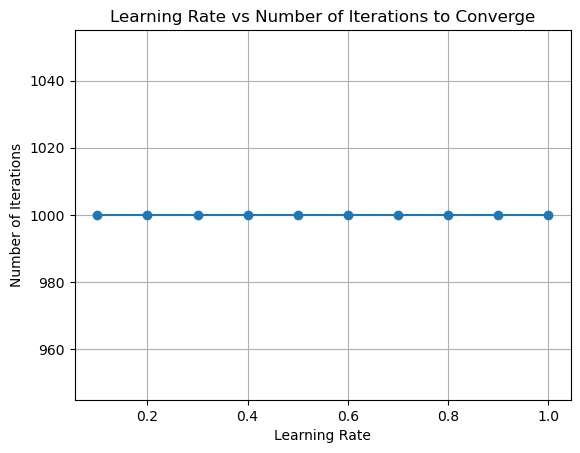

Learning Rate: 0.1, Epochs to Converge: 1000
Learning Rate: 0.2, Epochs to Converge: 1000
Learning Rate: 0.30000000000000004, Epochs to Converge: 1000
Learning Rate: 0.4, Epochs to Converge: 1000
Learning Rate: 0.5, Epochs to Converge: 1000
Learning Rate: 0.6000000000000001, Epochs to Converge: 1000
Learning Rate: 0.7000000000000001, Epochs to Converge: 1000
Learning Rate: 0.8, Epochs to Converge: 1000
Learning Rate: 0.9, Epochs to Converge: 1000
Learning Rate: 1.0, Epochs to Converge: 1000


In [7]:

W0 = 10  
W1 = 0.2
W2 = -0.75
initial_weights = np.array([W0, W1, W2, 0]) 

def step_function(x):
    return 1 if x >= 0 else 0

def train_perceptron(inputs, outputs, weights, learning_rate, activation_function, max_epochs=1000, convergence_threshold=0.002):
    epochs = 0
    converged = False

    inputs_with_bias = np.c_[np.ones(inputs.shape[0]), inputs] 

    while not converged and epochs < max_epochs:
        total_error = 0
        converged = True

        for i in range(len(inputs)):
            weighted_sum = np.dot(inputs_with_bias[i], weights)
            
            prediction = activation_function(weighted_sum)
            
            error = outputs[i] - prediction
            
            if error != 0:
                converged = False
                weights += learning_rate * error * inputs_with_bias[i]
                total_error += error ** 2  

        epochs += 1

        if total_error <= convergence_threshold:
            converged = True

    return weights, epochs

learning_rates = [0.1 * i for i in range(1, 11)]  # [0.1, 0.2, ..., 1.0]
iterations_to_converge = []

for lr in learning_rates:
    weights = initial_weights.copy()  
    _, epochs = train_perceptron(inputs, outputs, weights, lr, step_function)
    iterations_to_converge.append(epochs)

plt.plot(learning_rates, iterations_to_converge, marker='o')
plt.title("Learning Rate vs Number of Iterations to Converge")
plt.xlabel("Learning Rate")
plt.ylabel("Number of Iterations")
plt.grid(True)
plt.show()

for lr, epochs in zip(learning_rates, iterations_to_converge):
    print(f"Learning Rate: {lr}, Epochs to Converge: {epochs}")
